In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
dataset = pd.read_csv("C:\\Users\\HP\Downloads\\assignment 17\\forestfires.csv", delimiter=",")
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['size_category']= label_encoder.fit_transform(dataset['size_category'])
dataset['month']= label_encoder.fit_transform(dataset['month'])
dataset['day']= label_encoder.fit_transform(dataset['day'])
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
dataset.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
dataset.shape

(517, 31)

In [6]:
dataset[dataset.duplicated()].shape

(8, 31)

In [7]:
dataset[dataset.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,1,6,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
215,7,2,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,0
303,6,0,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,1
426,1,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,1
461,1,2,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
501,1,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,1
508,1,0,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
dataset1=dataset.drop_duplicates()

In [9]:
dataset1.shape

(509, 31)

In [10]:
dataset1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
dataset1.describe()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,5.811395,2.736739,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,...,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917,0.728880
std,4.376452,1.923090,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,...,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466,0.444975
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,4.000000,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

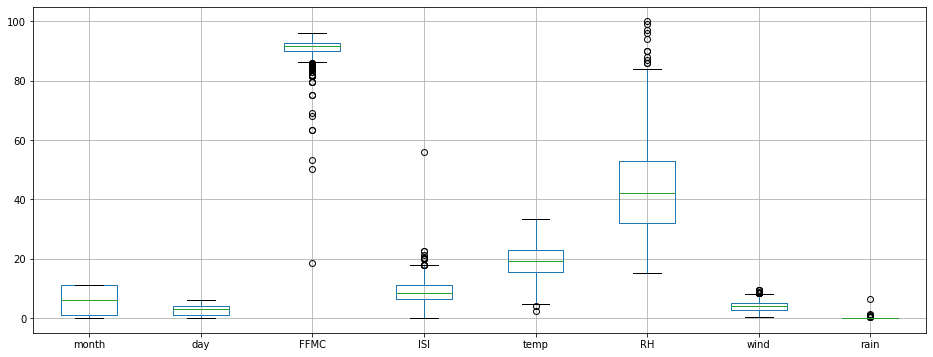

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
df = dataset1.iloc[:,:10]
df1=df.drop(['DC', 'DMC'], axis=1)
df1.boxplot()


<AxesSubplot:>

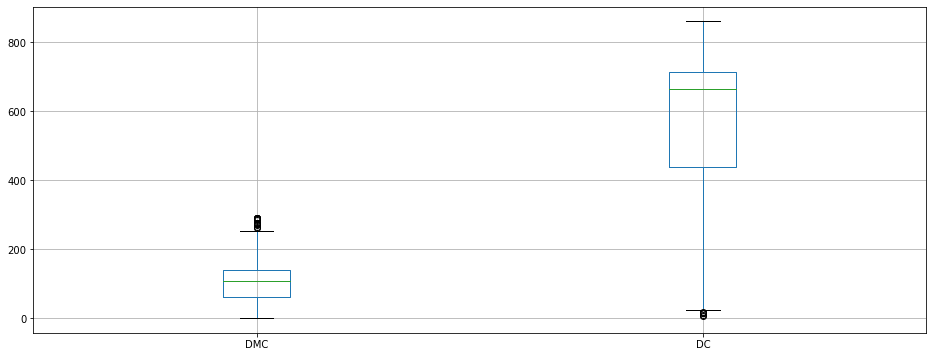

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
df2 = dataset1[['DMC','DC']]

df2.boxplot()


In [14]:
month_log = np.log(dataset['month'])
day_log = np.log(dataset['day'])
FFMC_log = np.log(dataset['FFMC'])
DMC_log = np.log(dataset['DMC'])
DC_log = np.log(dataset['DC'])
ISI_log = np.log(dataset['ISI'])
temp_log = np.log(dataset['temp'])
RH_log = np.log(dataset['RH'])
wind_log = np.log(dataset['wind'])
rain_log = np.log(dataset['rain'])

log = pd.concat([month_log, day_log, FFMC_log, DMC_log, DC_log, ISI_log, temp_log, RH_log, wind_log, rain_log], axis=1)

log.columns = ['month_log', 'day_log', 'FFMC_log', 'DMC_log', 'DC_log', 'ISI_log', 'temp_log', 'RH_log', 'wind_log', 'rain_log']
log.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,month_log,day_log,FFMC_log,DMC_log,DC_log,ISI_log,temp_log,RH_log,wind_log,rain_log
0,1.945910,-inf,4.456670,3.265759,4.546481,1.629241,2.104134,3.931826,1.902108,-inf
1,2.302585,1.609438,4.506454,3.566712,6.505934,1.902108,2.890372,3.496508,-0.105361,-inf
2,2.302585,0.693147,4.506454,3.777348,6.532189,1.902108,2.681022,3.496508,0.262364,-inf
3,1.945910,-inf,4.518522,3.505557,4.350278,2.197225,2.116256,4.574711,1.386294,-1.609438
4,1.945910,1.098612,4.492001,3.937691,4.626932,2.261763,2.433613,4.595120,0.587787,-inf


C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


<AxesSubplot:>

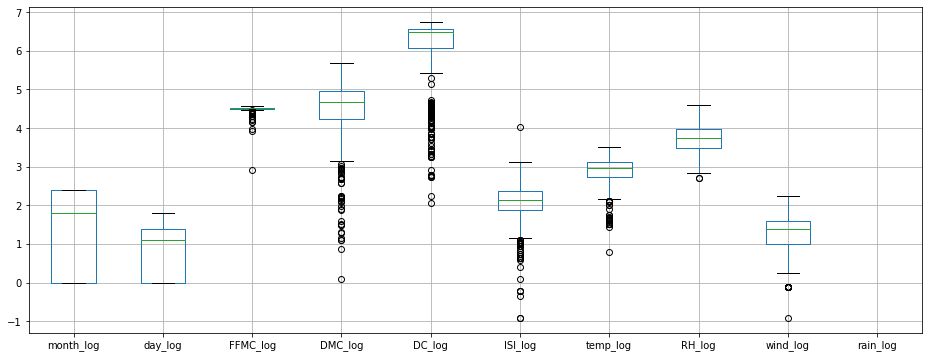

In [15]:
plt.figure(figsize=(16, 6))


log.boxplot()


In [16]:
month_sqrt = (dataset['month'])**(1/2)
day_sqrt = (dataset['day'])**(1/2)
FFMC_sqrt = (dataset['FFMC'])**(1/2)
DMC_sqrt = (dataset['DMC'])**(1/2)
DC_sqrt = (dataset['DC'])**(1/2)
ISI_sqrt = (dataset['ISI'])**(1/2)
temp_sqrt = (dataset['temp'])**(1/2)
RH_sqrt = (dataset['RH'])**(1/2)
wind_sqrt = (dataset['wind'])**(1/2)
rain_sqrt = (dataset['rain'])**(1/2)

size_category = dataset1['size_category']
fire = pd.concat([month_sqrt, day_sqrt, FFMC_sqrt, DMC_sqrt, DC_sqrt, ISI_sqrt, temp_sqrt, RH_sqrt, wind_sqrt, rain_sqrt, size_category], axis=1)

fire.columns = ['month_sqrt', 'day_sqrt', 'FFMC_sqrt', 'DMC_sqrt', 'DC_sqrt', 'ISI_sqrt', 'temp_sqrt', 'RH_sqrt', 'wind_sqrt', 'rain_sqrt', 'size_category']
fire.head()
fire.isnull().sum()
fire.dropna(inplace=True)
fire.isnull().sum()

month_sqrt       0
day_sqrt         0
FFMC_sqrt        0
DMC_sqrt         0
DC_sqrt          0
ISI_sqrt         0
temp_sqrt        0
RH_sqrt          0
wind_sqrt        0
rain_sqrt        0
size_category    0
dtype: int64

<AxesSubplot:>

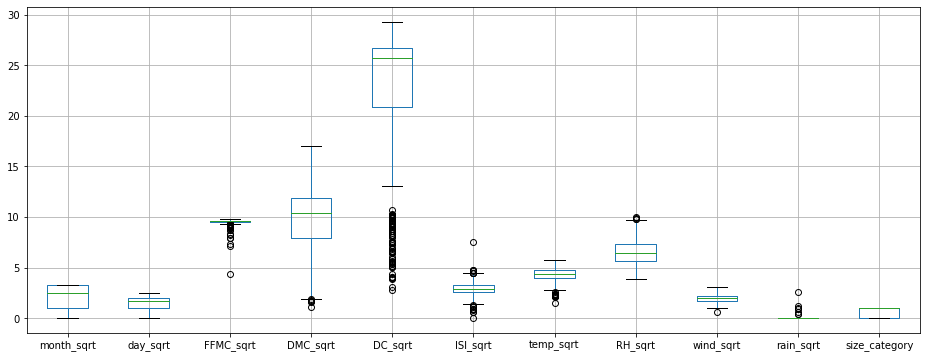

In [17]:
plt.figure(figsize=(16, 6))

fire.boxplot()


In [18]:
corr = fire.corr()
corr

,month_sqrt,day_sqrt,FFMC_sqrt,DMC_sqrt,DC_sqrt,ISI_sqrt,temp_sqrt,RH_sqrt,wind_sqrt,rain_sqrt,size_category
month_sqrt,1.000000,-0.158529,-0.019032,-0.141549,0.124161,-0.154187,-0.058835,-0.093993,-0.122089,-0.094140,-0.024672
day_sqrt,-0.158529,1.000000,0.032940,0.063334,0.050761,0.050455,0.130378,-0.105451,-0.068903,0.026277,-0.012035
FFMC_sqrt,-0.019032,0.032940,1.000000,0.423981,0.306196,0.637889,0.410680,-0.275245,0.006037,0.053144,-0.026996
DMC_sqrt,-0.141549,0.063334,0.423981,1.000000,0.772993,0.461332,0.563074,0.018982,-0.108965,0.086007,-0.038666
DC_sqrt,0.124161,0.050761,0.306196,0.772993,1.000000,0.331915,0.537507,-0.046940,-0.173604,0.035442,-0.032793
ISI_sqrt,-0.154187,0.050455,0.637889,0.461332,0.331915,1.000000,0.449435,-0.167314,0.095894,0.081142,0.004241
temp_sqrt,-0.058835,0.130378,0.410680,0.563074,0.537507,0.449435,1.000000,-0.503323,-0.204711,0.050897,0.012486
RH_sqrt,-0.093993,-0.105451,-0.275245,0.018982,-0.046940,-0.167314,-0.503323,1.000000,0.051720,0.150752,0.041132
wind_sqrt,-0.122089,-0.068903,0.006037,-0.108965,-0.173604,0.095894,-0.204711,0.051720,1.000000,0.097323,-0.060371
rain_sqrt,-0.094140,0.026277,0.053144,0.086007,0.035442,0.081142,0.050897,0.150752,0.097323,1.000000,-0.018503


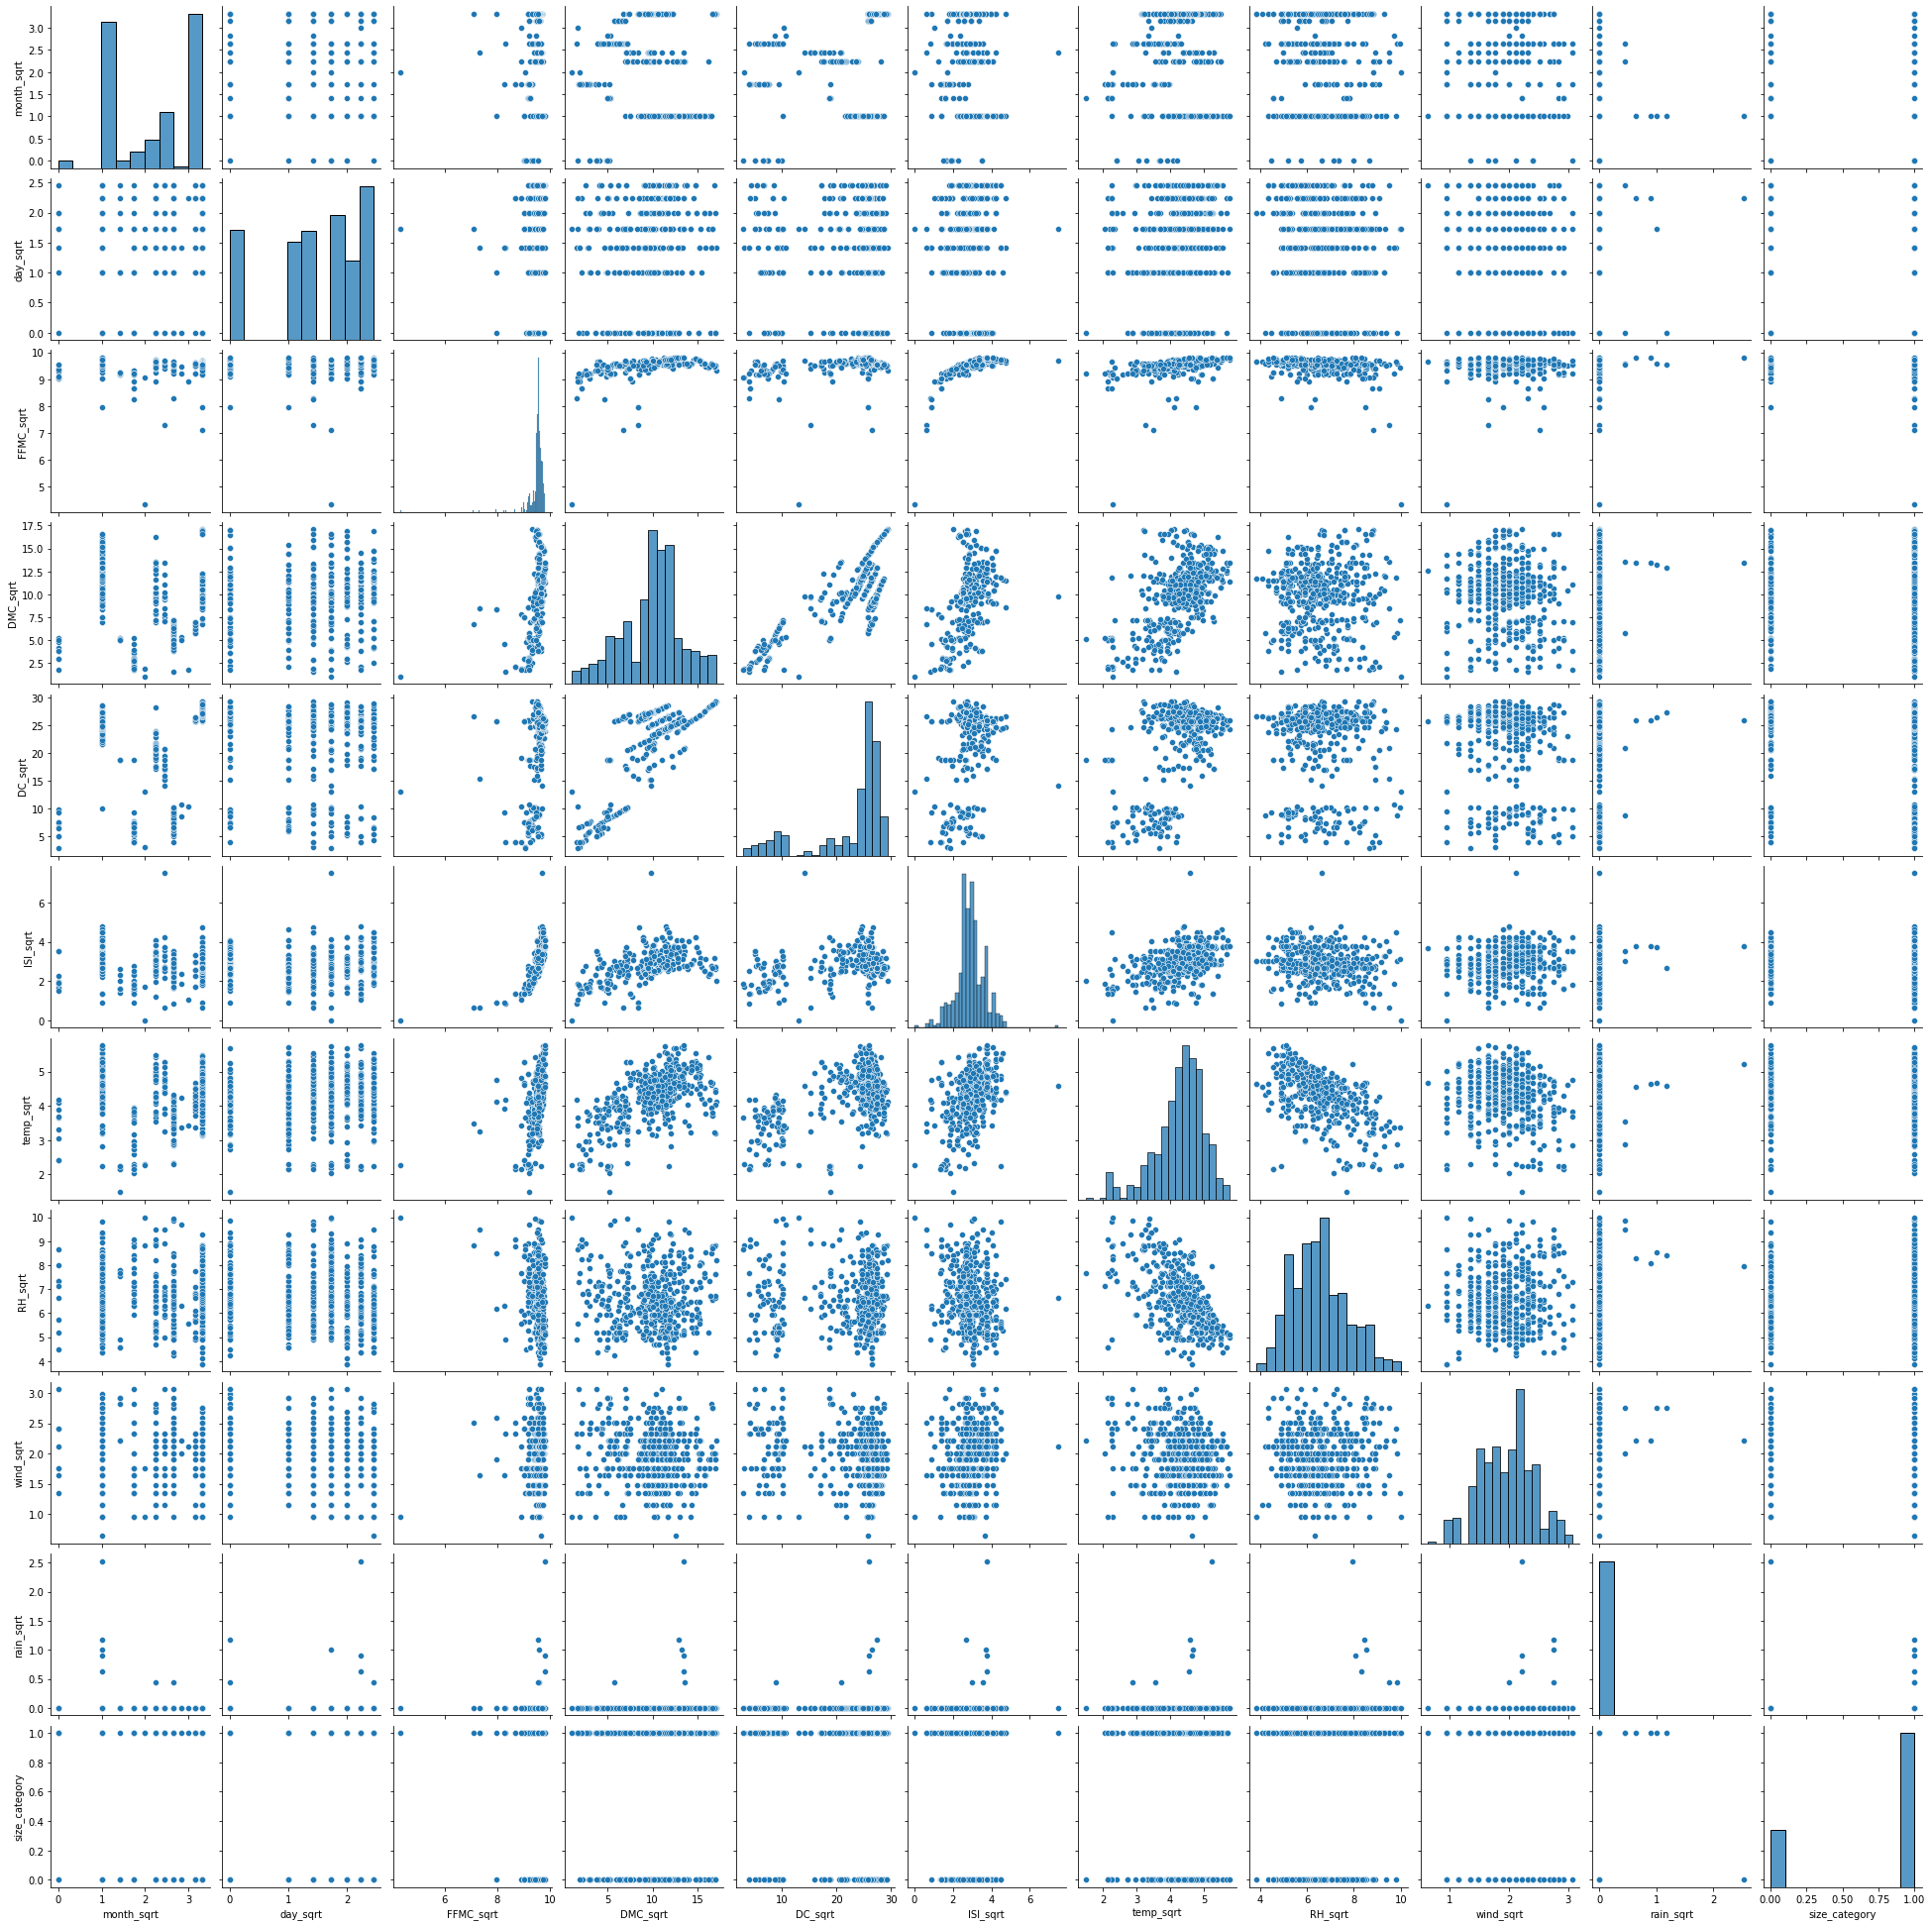

In [19]:
sns.pairplot(fire)

In [20]:
array = fire.values
X = array[:,0:10]
Y = array[:,10]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((356, 10), (356,), (153, 10), (153,))

### Grid Search CV

In [26]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,10,5,0.5],'C':[15,10,9,8,5] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 10, 9, 8, 5], 'gamma': [50, 10, 5, 0.5],
                          'kernel': ['rbf']}])

In [27]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7054761904761905)

In [28]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.50980392156863


array([[  3,  37],
       [  2, 111]], dtype=int64)

In [29]:
# it concluded that even though the accuracy of the model is 74.50% but the classification was not done properly.
# As per confusion matrix there are two cluster in which one cluster has only 3 correct values along with 2 misclassifiers
# while another cluster predicted 111 values with 37 misclassifiers.
